# Tarea 2
### Ejercicio 2

## Jonathan Alexis Urrutia Anguiano

In [1]:
from pylab import *
%matplotlib inline

Ahora deseamos encontrar todas las raices de una función  $f:\mathbb{R}^2 \to \mathbb{R}$ dada por la expresión
$$
f(x, y) = 2e^{−(x+1)^2}\left(e^{−(y+2)^2} + e^{−(y−2)^2}\right)+ 6x(x^2 + y^2) e^{−(x^2+y^2)} − 1
$$

In [2]:
def funcion_fea(x):  #x es un arreglo de dos entradas
    xmas1 = (x[0] + 1.)**2
    ymas2 = (x[1] + 2.)**2
    ymen2 = (x[1] - 2.)**2
    r2 = x[0]**2 + x[1]**2
    return 2.*exp(-xmas1)*(exp(-ymas2) + exp(-ymen2)) + 6.*x[0]*r2*exp(-r2)-1

Aquí escribiremos un código para encontrar las raices de una función escalar con entradas en dos dimensiones. La función bisección funciona para funciones de $n$ variables y encuentra sólo una raíz dado un intervalo. 

In [3]:
def biseccion(func, r_l, r_r ,err=1e-8):
    r_l, r_r = array(r_l) , array(r_r)
    root = 0.5*(r_l+ r_r)     
    f_l, f_r = func(r_l) , func(r_r)   

    while abs(f_l - f_r)>= err:
        f_m = func(root)
        if f_m==.0:
            break
        if f_l*f_m < 0:
            r_r = root
        else:
            r_l = root
        root = 0.5 *(r_l+r_r)
        f_l, f_r = func(r_l) , func(r_r)
    return array(root)   

Como queremos no sólo una raíz, sino todas, se hará lo mismo que en el ejercicio 1. Se barrera la región deseada en pasos más \emph{grandes} en comparación a la presición que deseamos. Cuando un el producto de los extremos de la función sea negativo entonces garantizamos que ahí hay una raíz, entonces ese intervalo será utilizado para encontrar una raíz con la función definida arriba. El valor dado por \emph{biseccion} se almacenará y se seguirá con el barrido del grid utilizado.

Dado que no conocemos de antemano el número de raíces que nos podemos encontrar, se declaran listas vacías que a las que se les concatena las coordenadas de las raíces encontradas. No se utilizan arreglos de ceros porque no necesariamente el punto $(0,0)$ es una raíz de la función.

In [4]:
def raices_mapeo(func, intervalo, h=1e-2):  #intervalo = [x_i,x_f,y_i,y_f]
    x = arange(intervalo[0],intervalo[1]+h,h)
    y = arange(intervalo[2],intervalo[3]+h,h)
    x_roots = []
    y_roots = []
    
    for i in xrange(len(x)-1):
        for j in xrange(len(y)-1):
            r_l = [x[i], y[j]]
            r_r = [x[i], y[j+1]]
            f_l, f_r = func(r_l) , func(r_r)
            
            if f_l*f_r<=0:
                raiz = biseccion(func,r_l,r_r)
                x_roots.append(raiz[0])
                y_roots.append(raiz[1])
                
    return array([x_roots, y_roots])

### Gráficas obtenidas

A continuación se muestras las raices obtenidas con 3 grids distintos. El tiempo de cómputo se encuentra debajo de cada una

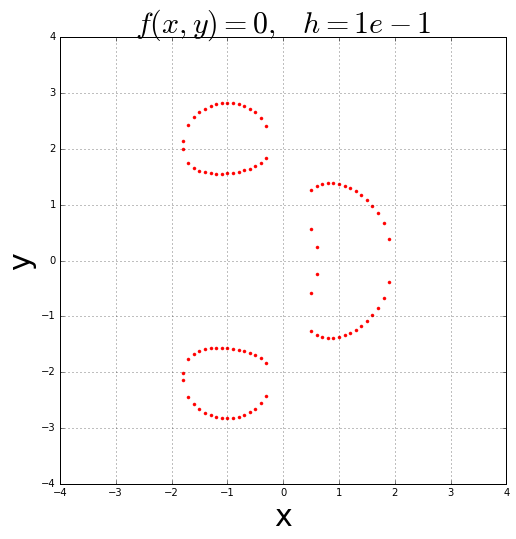

Wall time: 660 ms


In [5]:
%%time

fig, ax = plt.subplots(figsize=(8, 8))
grid(True)
title(r'$f(x, y) =  0,\; \;\; h = 1e-1$',fontsize = 30)
xlabel('x',fontsize=30 ),ylabel('y',fontsize = 30)

rootsX, rootsY =  raices_mapeo(funcion_fea,[-4,4,-4,4],1e-1)

xlim([-4,4]), ylim([-4,4])
plot(rootsX,rootsY,'.',color = 'r')
show()

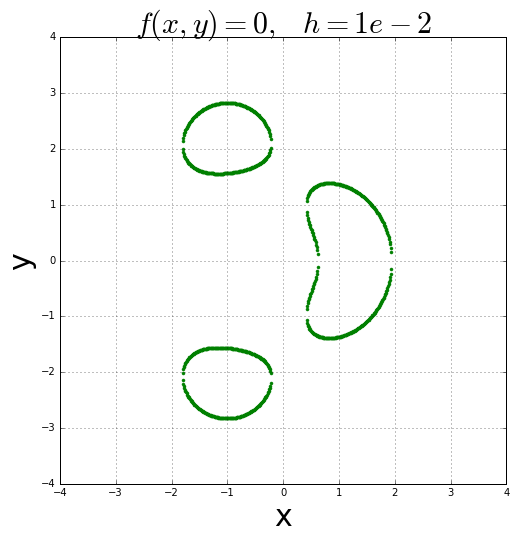

Wall time: 11.4 s


In [6]:
%%time

fig, ax = plt.subplots(figsize=(8, 8))
grid(True)
title(r'$f(x, y) =  0,\; \;\; h = 1e-2$',fontsize = 30)
xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

rootsX, rootsY =  raices_mapeo(funcion_fea,[-4,4,-4,4])

xlim([-4,4]), ylim([-4,4])
plot(rootsX,rootsY,'.',color = 'g')
show()

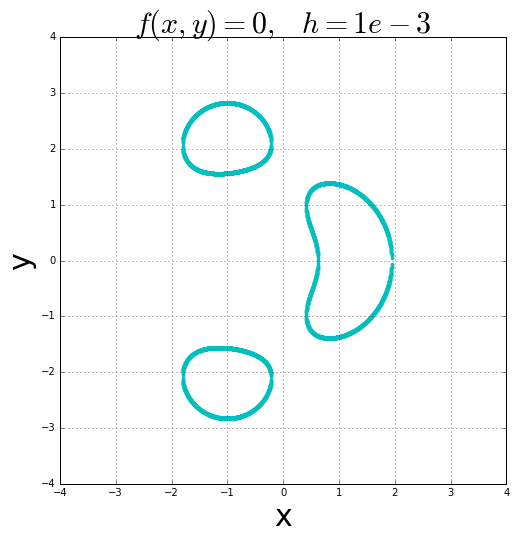

Wall time: 16min 23s


In [7]:
%%time

fig, ax = plt.subplots(figsize=(8, 8))
grid(True)
title(r'$f(x, y) =  0,\; \;\; h = 1e-3$',fontsize = 30)
xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

rootsX, rootsY =  raices_mapeo(funcion_fea,[-4,4,-4,4],1e-3)

xlim([-4,4]), ylim([-4,4])
plot(rootsX,rootsY,'.',color = 'c')
show()

En estas tres gráficas se puede observar la influencia que tien el tamaño del grid utilizado y el número de raíces que encunetra el algoritmo. Sin embargo, cabe destacar lo mucho que se prolonga el tiempo de cómputo al hacer más chico el paso. A pesar de que en el paso de $h = 10^{-3}$ se encuntran raíces que no se detectan en el de $h=^{-2}$, el timepo, con una interpolación esos resultados pueden obtenerse y el tiempo de cómputo es evidentemente menor.